<a href="https://colab.research.google.com/github/natgoodrich371/CS-4650_Goodrich-Stock-Updates/blob/main/Nathan_Goodrich_Stock_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this week, I remained consistent with using a linear regression model to predict future stock prices. However, considering that the stock market completely crashed this week, it's hard to take these predictions seriously. For this week, I wanted to bet that there will be a resurgance within the next week and have a chance at getting a good return. With this knowledge, I decided to buy four stocks that usually cost a lot normally, but are at a discount now thanks to the crash.

1. Tesla. It was on the rise ever since the stock project began, so I'm betting on it rising again in the near future.
2. Meta. Similarily was trending up prior to the crash.
3. Moderna. I initally invested after hearing about a recent rise in covid vaccinations, though it may have ironically dipped because of the concern about its effectiveness against the new variant.
4. Google. Once again, another big company that has a discounted price for its stock.

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('bmh')
uploaded = files.upload()

Saving tsla_data.csv to tsla_data (3).csv


In [47]:
import io
data = pd.read_csv(io.BytesIO(uploaded['tsla_data.csv']))

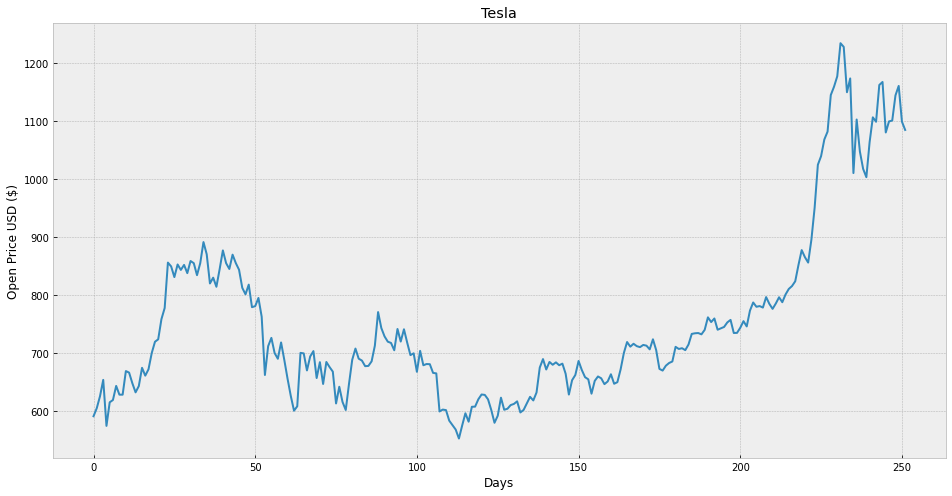

In [48]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Open Price USD ($)')
plt.plot(data['Open'])
plt.show()

In [49]:
test = data[['Open']]
coming_up = 7
test['Prediction'] = test[['Open']].shift(-coming_up)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]

In [51]:
y = np.array(test['Prediction'])[:-coming_up]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train) 

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)

In [53]:
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


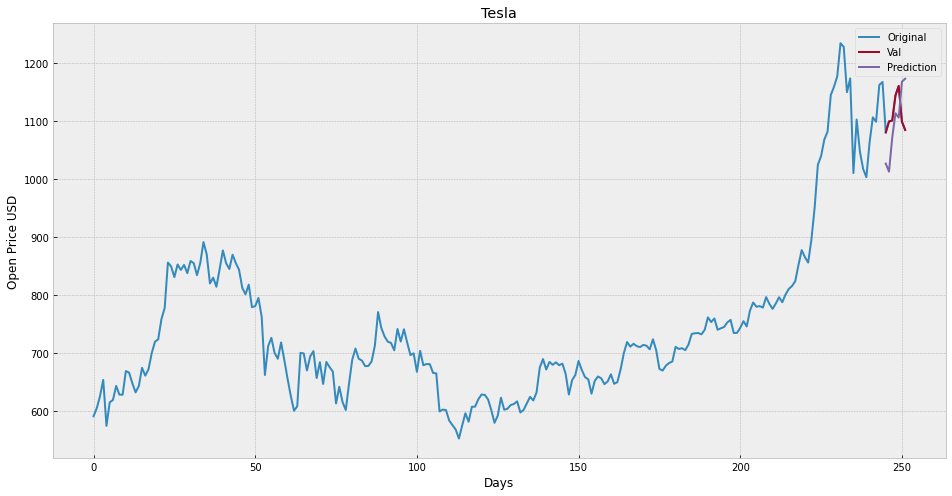

In [54]:
predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [55]:
uploaded = files.upload()

Saving fb_data.csv to fb_data (2).csv


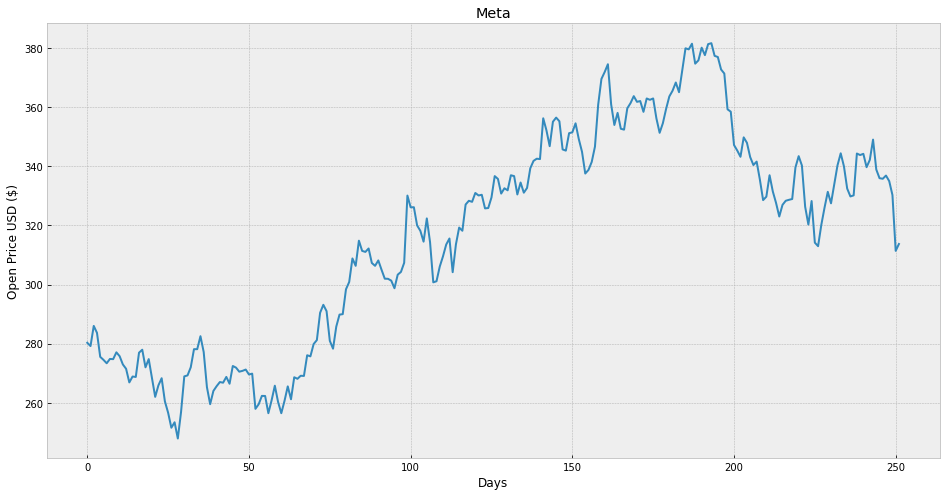

In [56]:
data = pd.read_csv(io.BytesIO(uploaded['fb_data.csv']))
plt.figure(figsize=(16,8))
plt.title('Meta')
plt.xlabel('Days')
plt.ylabel('Open Price USD ($)')
plt.plot(data['Open'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


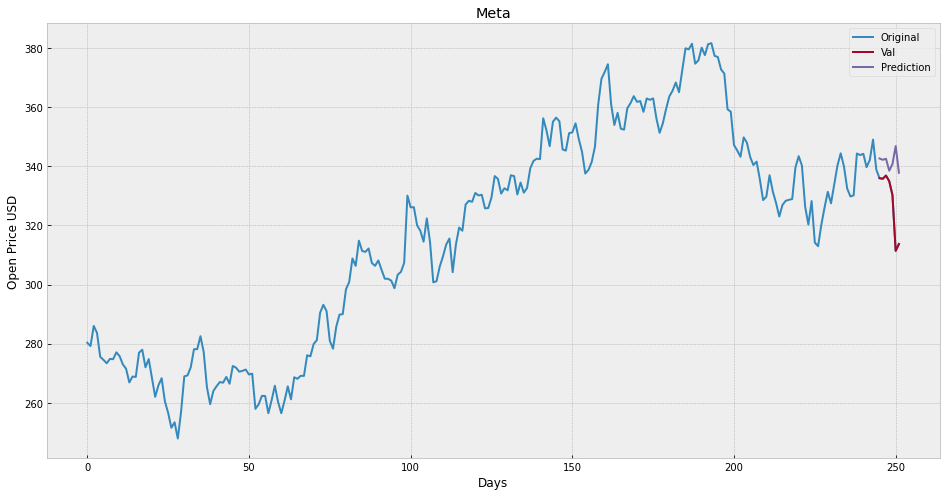

In [57]:
test = data[['Open']]
coming_up = 7
test['Prediction'] = test[['Open']].shift(-coming_up)
x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
y = np.array(test['Prediction'])[:-coming_up]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train) 

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)

tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Meta')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [58]:
uploaded = files.upload()

Saving mrna_data.csv to mrna_data (2).csv


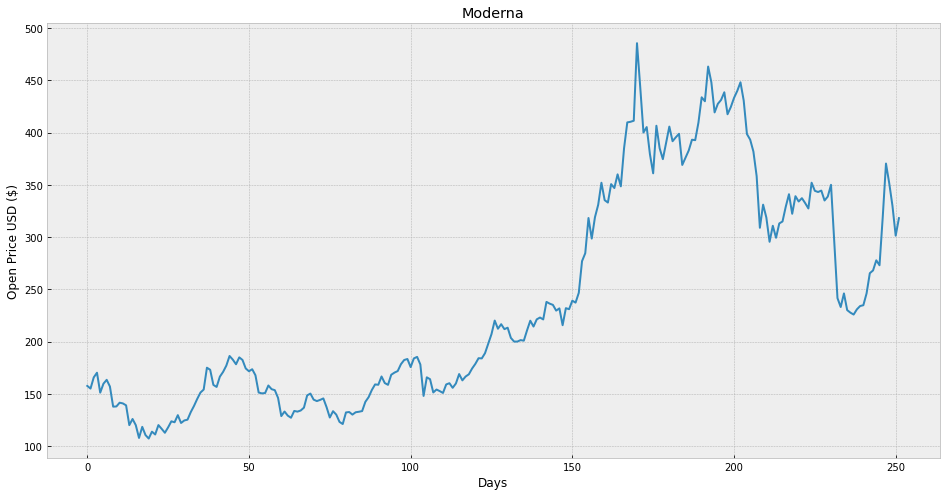

In [59]:
data = pd.read_csv(io.BytesIO(uploaded['mrna_data.csv']))
plt.figure(figsize=(16,8))
plt.title('Moderna')
plt.xlabel('Days')
plt.ylabel('Open Price USD ($)')
plt.plot(data['Open'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


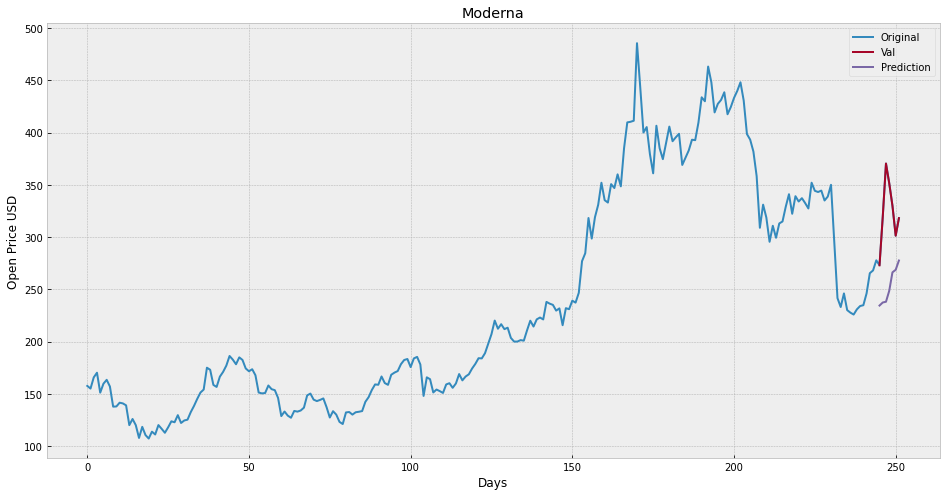

In [60]:
test = data[['Open']]
coming_up = 7
test['Prediction'] = test[['Open']].shift(-coming_up)
x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
y = np.array(test['Prediction'])[:-coming_up]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train) 

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)

tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Moderna')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [61]:
uploaded = files.upload()

Saving goog_data.csv to goog_data (2).csv


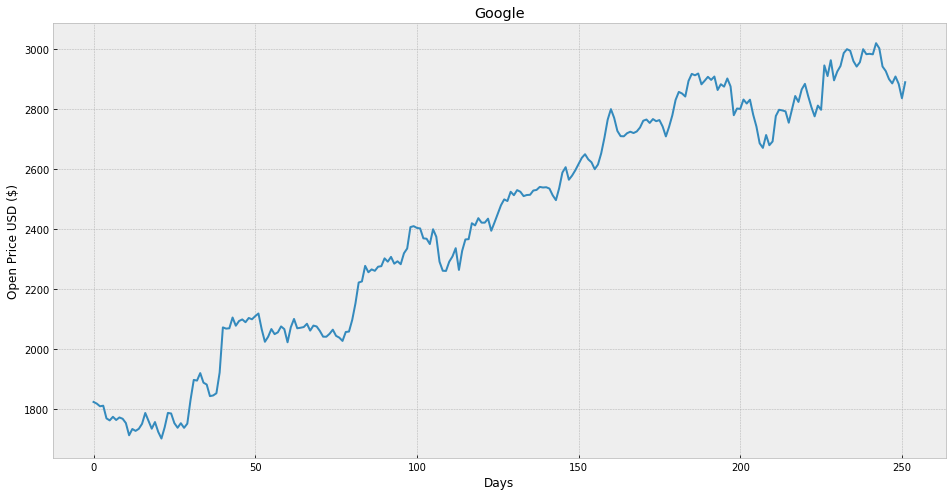

In [62]:
data = pd.read_csv(io.BytesIO(uploaded['goog_data.csv']))
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Open Price USD ($)')
plt.plot(data['Open'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


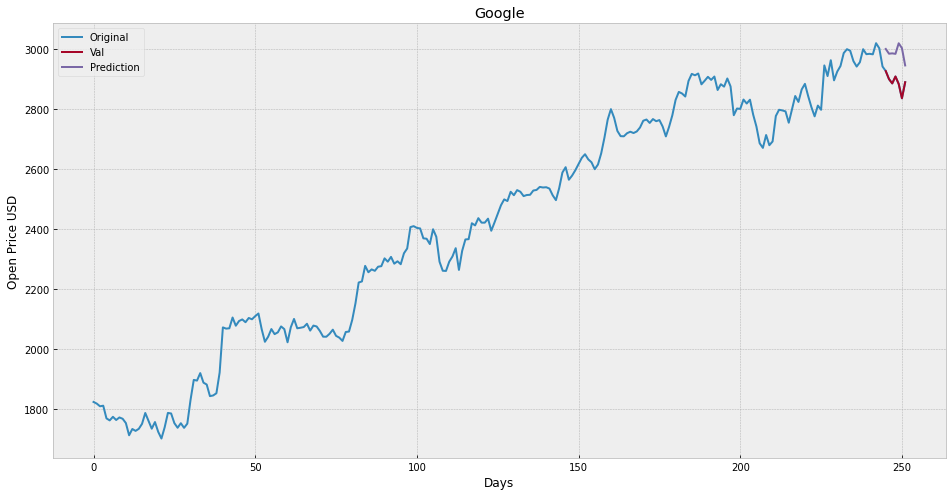

In [63]:
test = data[['Open']]
coming_up = 7
test['Prediction'] = test[['Open']].shift(-coming_up)
x = np.array(test.drop(['Prediction'], axis=1))[:-coming_up]
y = np.array(test['Prediction'])[:-coming_up]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train) 

lr = LinearRegression().fit(x_train, y_train)

x_future = test.drop(['Prediction'], axis =1)[:-coming_up]
x_future = x_future.tail(coming_up)
x_future = np.array(x_future)

tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

predictions = lr_prediction

valid = test[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Open Price USD')

plt.plot(test['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()